In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
# Cambiar color de fondo
def cambiar_fondo(img, nuevo_color):
    mask = np.all(img > [200, 200, 200], axis=2)
    img[mask] = nuevo_color
    return img

# Ajustar brillo y contraste
def ajustar_brillo_contraste(img, brillo, contraste):
    return cv2.convertScaleAbs(img, alpha=contraste, beta=brillo)

# Aplicar el operador Sobel
def aplicar_sobel(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_total = cv2.magnitude(sobelx, sobely)
    sobel_total = cv2.convertScaleAbs(sobel_total)
    return sobel_total

# Función para aplicar Image Matting
def aplicar_image_matting(img, alpha_path):
    try:
        # Cargar la máscara alpha
        alpha = cv2.imread(alpha_path, cv2.IMREAD_GRAYSCALE)
        if alpha is None:
            print("Error: La máscara alpha no se pudo cargar. Verifica la ruta del archivo.")
            return None

        # Verificar que las dimensiones coincidan
        if img.shape[:2] != alpha.shape[:2]:
            print("Error: Las dimensiones de la imagen y la máscara no coinciden.")
            return None

        # Normalizar la máscara alpha
        alpha = alpha.astype(np.float32) / 255.0
        bgra = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
        bgra[:, :, 3] = alpha * 255  # Aplicar la máscara como canal alpha
        return bgra

    except Exception as e:
        print(f"Error al aplicar image matting: {e}")
        return None



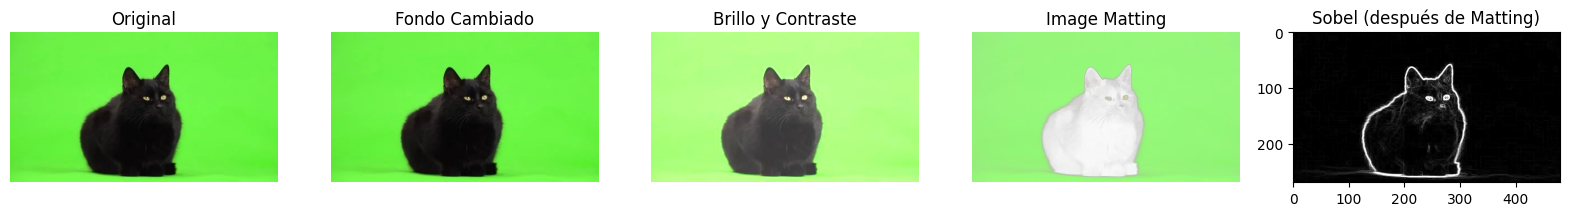

In [ ]:
# Cargar la imagen
imagen = cv2.imread('/content/cat.jpg')
if imagen is None:
    print("Error: La imagen no se pudo cargar. Verifica la ruta del archivo.")
else:
    # Cambiar el fondo de la imagen a rosado
    nuevo_fondo = [255, 192, 203]  # Color rosado en formato BGR
    imagen_fondo_cambiado = cambiar_fondo(imagen.copy(), nuevo_fondo)

    # Ajustar brillo y contraste
    imagen_brillo_contraste = ajustar_brillo_contraste(imagen.copy(), 50, 1.2)

    # Aplicar Sobel a la imagen original
    imagen_sobel = aplicar_sobel(imagen)

    # Aplicar Image Matting
    alpha_path = '/content/cat.jpg'
    imagen_matting = aplicar_image_matting(imagen.copy(), alpha_path)

    if imagen_matting is not None:
        # Aplicar Sobel después del image matting
        imagen_sobel_matting = aplicar_sobel(cv2.cvtColor(imagen_matting, cv2.COLOR_BGRA2BGR))

        # Mostrar resultados
        plt.figure(figsize=(20, 10))  # Ajustado para mostrar las 5 imágenes

        plt.subplot(1, 5, 1)
        plt.title('Original')
        plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 5, 2)
        plt.title('Fondo Cambiado')
        plt.imshow(cv2.cvtColor(imagen_fondo_cambiado, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 5, 3)
        plt.title('Brillo y Contraste')
        plt.imshow(cv2.cvtColor(imagen_brillo_contraste, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 5, 4)
        plt.title('Image Matting')
        plt.imshow(cv2.cvtColor(imagen_matting, cv2.COLOR_BGRA2RGBA))
        plt.axis('off')

        plt.subplot(1, 5, 5)
        plt.title('Sobel (después de Matting)')
        plt.imshow(imagen_sobel_matting, cmap='gray')
        plt